In [1]:
# Credits: https://machinelearningmastery.com/sequence-classification-lstm-recurrent-neural-networks-python-keras/
# LSTM for sequence classification in the IMDB dataset
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM, GRU, BatchNormalization
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.utils import np_utils
# fix random seed for reproducibility
numpy.random.seed(7)


Using TensorFlow backend.


In [0]:
#Refer: https://keras.io/datasets/#imdb-movie-reviews-sentiment-classification

# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, Y_train), (X_test, Y_test) = imdb.load_data(nb_words=top_words)


    8192/17464789 [..............................] - ETA: 0s

/usr/local/lib/python3.6/dist-packages/keras/datasets/imdb.py:49: UserWarning: The `nb_words` argument in `load_data` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `load_data` '


17465344/17464789 [==============================] - 0s 0us/step


In [0]:
Y_train[0]

1

In [0]:
print(X_train[1])
print(type(X_train[1]))
print(len(X_train[1]))

[1, 194, 1153, 194, 2, 78, 228, 5, 6, 1463, 4369, 2, 134, 26, 4, 715, 8, 118, 1634, 14, 394, 20, 13, 119, 954, 189, 102, 5, 207, 110, 3103, 21, 14, 69, 188, 8, 30, 23, 7, 4, 249, 126, 93, 4, 114, 9, 2300, 1523, 5, 647, 4, 116, 9, 35, 2, 4, 229, 9, 340, 1322, 4, 118, 9, 4, 130, 4901, 19, 4, 1002, 5, 89, 29, 952, 46, 37, 4, 455, 9, 45, 43, 38, 1543, 1905, 398, 4, 1649, 26, 2, 5, 163, 11, 3215, 2, 4, 1153, 9, 194, 775, 7, 2, 2, 349, 2637, 148, 605, 2, 2, 15, 123, 125, 68, 2, 2, 15, 349, 165, 4362, 98, 5, 4, 228, 9, 43, 2, 1157, 15, 299, 120, 5, 120, 174, 11, 220, 175, 136, 50, 9, 4373, 228, 2, 5, 2, 656, 245, 2350, 5, 4, 2, 131, 152, 491, 18, 2, 32, 2, 1212, 14, 9, 6, 371, 78, 22, 625, 64, 1382, 9, 8, 168, 145, 23, 4, 1690, 15, 16, 4, 1355, 5, 28, 6, 52, 154, 462, 33, 89, 78, 285, 16, 145, 95]
<class 'list'>
189


In [0]:
# truncate and/or pad input sequences
max_review_length = 600
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

print(X_train.shape)
print(X_train[1])

In [0]:
# create the model
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
#Refer: https://datascience.stackexchange.com/questions/10615/number-of-parameters-in-an-lstm-model

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 600, 32)           160000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 213,301
Trainable params: 213,301
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
model.fit(X_train, y_train, nb_epoch=10, batch_size=64)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/10
25000/25000 [==============================] - 295s 12ms/step - loss: 0.4567 - acc: 0.7825
Epoch 2/10
20160/25000 [=======================>......] - ETA: 57s - loss: 0.3694 - acc: 0.834325000/25000 [==============================] - 295s 12ms/step - loss: 0.3647 - acc: 0.8385
Epoch 3/10
25000/25000 [==============================] - 297s 12ms/step - loss: 0.5037 - acc: 0.7639
Epoch 4/10
 4416/25000 [====>.........................] - ETA: 4:03 - loss: 0.3698 - acc: 0.838525000/25000 [==============================] - 297s 12ms/step - loss: 0.3554 - acc: 0.8503
Epoch 5/10
24832/25000 [============================>.] - ETA: 1s - loss: 0.2673 - acc: 0.896125000/25000 [==============================] - 296s 12ms/step - loss: 0.2671 - acc: 0.8961
Epoch 6/10
25000/25000 [==============================] - 297s 12ms/step - loss: 0.2477 - acc: 0.9051
Epoch 7/10
 5824/25000 [=====>........................] - ETA: 3:47 - loss: 0.1967 - acc: 0.926525000/25000 [===========================

In [0]:
import pandas as pd
import sqlite3

In [4]:
from google.colab import files
uploaded = files.upload()

Saving Cleaned_Text.csv to Cleaned_Text.csv


In [5]:
import io
data = pd.read_csv(io.BytesIO(uploaded['Cleaned_Text.csv']))
data.drop(['Unnamed: 0'], axis =1, inplace=True)
data.head()

,Score,Text,CleanedText
0,negative,"I, myself always enjoyed this movie, it's very...",i myself always enjoyed this movie its very fu...
1,positive,This was a really good idea and the final prod...,this was a really good idea and the final prod...
2,positive,I just received my shipment and could hardly w...,i just received my shipment and could hardly w...
3,negative,I am continually amazed at the shoddy treatmen...,i am continually amazed at the shoddy treatmen...
4,negative,"Just to let you know, this movie is one of my ...",just to let you know this movie is one of my p...


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train, x_test, y_train,  y_test = train_test_split(data['CleanedText'], data['Score'], stratify = data['Score'], test_size = 0.2)

In [0]:
from collections import Counter

In [9]:
all_words = []
for sent in x_train.values.tolist():
  all_words.extend(sent.split())

len(all_words)

3914494

In [0]:
counter = Counter(all_words)

In [11]:
top_words = counter.most_common(n=10000)
len(top_words)

10000

In [0]:
top_words[-5:-1]

[('$70', 10), ('magnet', 10), ('watkins', 10), ('microwaves', 10)]

In [0]:
top_words[0:5]

[('the', 168076), ('i', 134139), ('and', 107073), ('a', 97016), ('to', 87629)]

In [0]:
ranked_words = {}
rank = 1
rank_val = top_words[0][1]
for word in top_words:
  if word[1] < rank_val:
    rank_val = word[1]
    rank = rank + 1
  ranked_words[word[0]] = rank

In [0]:
formated_x_train = []
formated_x_test = []

for sent in x_train.values.tolist():
  formated_sent = []
  for word in sent:
    if word in ranked_words:
      formated_sent.append(ranked_words[word])
    else:
      formated_sent.append(0)
  formated_x_train.append(formated_sent)

for sent in x_test.values.tolist():
  formated_sent = []
  for word in sent:
    if word in ranked_words:
      formated_sent.append(ranked_words[word])
    else:
      formated_sent.append(0)
  formated_x_test.append(formated_sent)

In [0]:
formated_y_train = []
formated_y_test = []

for score in y_train.values.tolist():
  if score == 'negative':
    formated_y_train.append(0)
  else:
    formated_y_train.append(1)
    
for score in y_test.values.tolist():
  if score == 'negative':
    formated_y_test.append(0)
  else:
    formated_y_test.append(1)

In [15]:
max_review_length = 600
x_train = sequence.pad_sequences(formated_x_train, maxlen=max_review_length)
x_test = sequence.pad_sequences(formated_x_test, maxlen=max_review_length)

print(x_train.shape)
print(x_train[1])

(48000, 600)
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    

In [0]:
from keras import regularizers

In [0]:
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
def plt_dynamic(x, vy, ty, ax, colors=['b']):
  ax.plot(x, vy, 'b', label="Validation Loss")
  ax.plot(x, ty, 'r', label="Train Loss")
  plt.legend()
  plt.grid()
  fig.canvas.draw()

In [19]:
# create the model
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(10000, embedding_vecor_length, input_length=max_review_length))
model.add(Dropout(0.2))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(100))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
#Refer: https://datascience.stackexchange.com/questions/10615/number-of-parameters-in-an-lstm-model

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 600, 32)           320000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 600, 32)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 600, 100)          53200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 600, 100)          0         
_________________________________________________________________
gru_1 (GRU)                  (None, 100)               60300     
_________________________________________________________________
dropout_3 (Dropout)  

In [24]:
history = model.fit(x_train, formated_y_train, nb_epoch=10, batch_size=64, validation_data=(x_test, formated_y_test))
# Final evaluation of the modeler
scores = model.evaluate(x_test, formated_y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 2061s 43ms/step - loss: 0.5025 - acc: 0.7534 - val_loss: 0.5055 - val_acc: 0.7479
Epoch 2/10
48000/48000 [==============================] - 2064s 43ms/step - loss: 0.4800 - acc: 0.7659 - val_loss: 0.4711 - val_acc: 0.7683
Epoch 3/10
48000/48000 [==============================] - 2080s 43ms/step - loss: 0.4583 - acc: 0.7812 - val_loss: 0.4426 - val_acc: 0.7913
Epoch 4/10
48000/48000 [==============================] - 2057s 43ms/step - loss: 0.4374 - acc: 0.7941 - val_loss: 0.4247 - val_acc: 0.8023
Epoch 5/10
48000/48000 [==============================] - 2062s 43ms/step - loss: 0.4141 - acc: 0.8086 - val_loss: 0.4610 - val_acc: 0.7730
Epoch 6/10
48000/48000 [==============================] - 2062s 43ms/step - loss: 0.3983 - acc: 0.8157 - val_loss: 0.3789 - val_acc: 0.8288
Epoch 7/10
48000/48000 [==============================] - 2056s 43ms/step - loss: 0.3828 - acc: 0.8242 - val_l

In [25]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

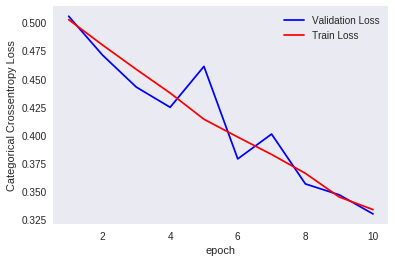

In [26]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,11))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## Conclusion



1.   Used GRU instead of LSTM to check if the training speeds up, It was faster then having 2 LSTMs
2.   Used drop drop out in between both LSTM and GRU layers
3. Accuracy at the end of the training it 85.73%
4. No Overfitting from the graph

